In [ ]:
import qsharp
import numpy as np
import math
import matplotlib.pyplot as plt

from PhaseEstimation import run

In [ ]:
def run_estimation(n_shots, phi, n_oracle):
    """Runs the simulation following the given parameters.

    Args:
        n_shots (int): Number of shots to run the simulation.
        phi (double): The phase to estimate.
        n_oracle (int): Number of oracles to apply.

    Returns:
        int: The difference between the estimated phase and the real phase.
    """
    result = run.simulate(nShots=n_shots, phi=phi, oraclePower=n_oracle)

    #la somme des 1s diviser par le nb de shots
    proba_stat = result[1] / n_shots

    phi_stat = (2/n_oracle) * (math.asin(math.sqrt(proba_stat)) - math.pi/4)

    return abs(phi_stat - phi)

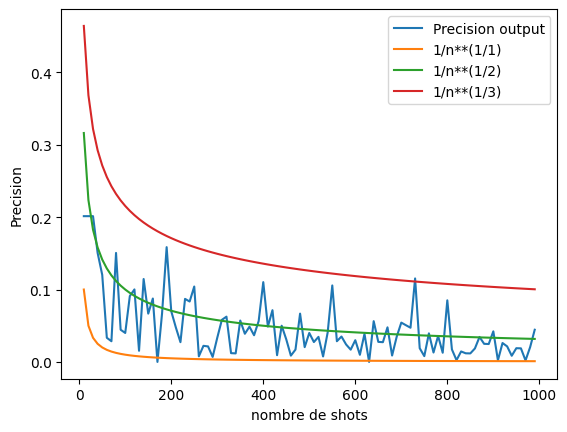

In [ ]:
n_shots = 20
phi = 0
n_oracle = 10

n_shots_list = []
res_list = []
# Iterates over different shots values to run the simulation.
for i in range (10, 1000, 10):
    n_shots = i
    phi = 0
    n_oracle = 1

    n_shots_list.append(n_shots)
    res_list.append(run_estimation(n_shots, phi, n_oracle))

# Plot the results.
plt.ylabel('Precision')
plt.xlabel('nombre de shots')

plt.plot(n_shots_list, res_list, label="Precision output")

# Plot the comparison.
for i in range(1, 4):
    comparison = [1 / x**(1/i) for x in n_shots_list]
    plt.plot(n_shots_list, comparison, label=f"1/n**(1/{i})")
    plt.legend()

As we can see in the above graph the precision of the output fits the result of $\frac{1}{\sqrt{N}}$ for N the nomber of shots.

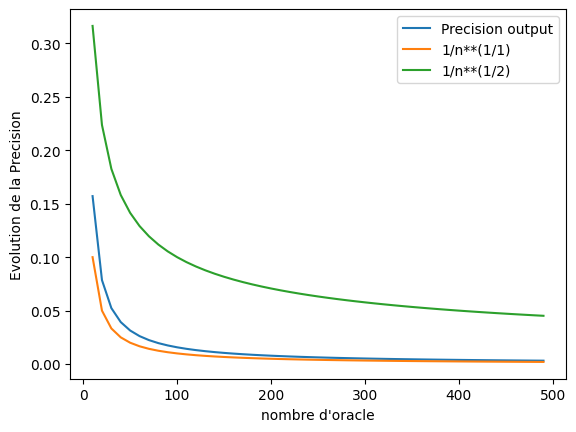

In [ ]:
n_shots = 10
phi = 0
n_oracle = 10

n_oracle_list = []
res_list = []
# Iterate over different oracle values to run the simulation.
for i in range (10, 500, 10):
    n_shots = 1
    phi = 0
    n_oracle = i

    n_oracle_list.append(n_oracle)
    res_list.append(run_estimation(n_shots, phi, n_oracle))
#Plot the results.
plt.ylabel('Evolution de la Precision')
plt.xlabel('nombre d\'oracle')

plt.plot(n_oracle_list, res_list, label="Precision output")

# Plot the comparison.
for i in range(1, 3):
    comparison = [1 / x**(1/i) for x in n_oracle_list]
    plt.plot(n_oracle_list, comparison, label=f"1/n**(1/{i})")
    plt.legend()

The Precision output fits the result of $\frac{1}{N}$ for N the number of oracles.